In [1]:
# Import modules
import sys
import os
import pandas as pd

In [2]:
# Append the project root path to sys.path
sys.path.append(os.path.abspath("../scripts"))

In [5]:
# Import Custom Module
import Brent_analysis as ba

In [7]:
# Load and Clean Data
file_path = "../data/BrentOilPrices.csv"
df_raw = ba.load_data(file_path)
df_raw.head()

C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-10\scripts\Brent_analysis.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=["Date"], dayfirst=True)


Loaded Sucessfully. 



,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [12]:
df_cleaned = ba.clean_data(df_raw)


Cleaned DataFrame

Cleaned Data:
         Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


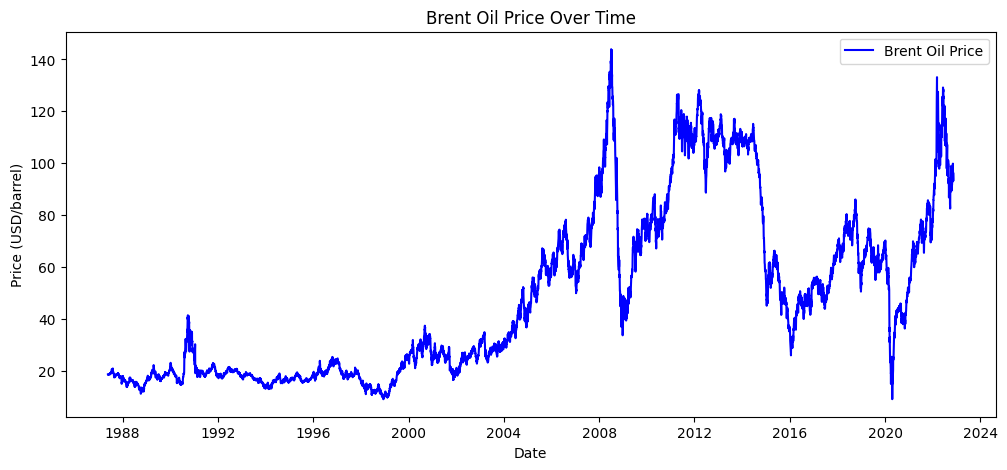

In [13]:

# Exploratory Data Analysis

ba.plot_price_series(df_cleaned)

In [14]:
ba.check_stationarity(df_cleaned)


Augmented Dickey-Fuller Test:
ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Critical Values 1%: -3.4310783342658615
Critical Values 5%: -2.861861876398633
Critical Values 10%: -2.566941329781918
